### NLP Project Language Detection using Classical Models 

This notebook is second part of Language detection project where we are applying classical models on the data.

In [1]:
## import libraries
import pandas as pd
import numpy as np

In [2]:
## import the data downloaded from data processing part 1 notebook
df= pd.read_csv("NLPdata.csv")
df

,text,language
0,"os chefes de defesa da estónia, letónia, lituâ...",Por
1,размерът на хоризонталната мрежа може да бъде ...,Bul
2,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...,Tha
3,Он увеличил давление .,Rus
4,"S Jak sobie życzysz: Widzisz, jak Hitler zabij...",Pol
...,...,...
102748,narcisa änderte ihre art und weise sie kämpfte...,Ger
102749,Wie' s Narzissmus jetzt erzählt Marian beiden ...,Ger
102750,"Hat sie, ich denke, sie würde jetzt kein Goldb...",Ger
102751,"Terry, du siehst tatsächlich ein bisschen wie ...",Ger


In [3]:
# Check for duplicates based on the 'Text' column to check if any left 
duplicates = df[df.duplicated(subset=['text'], keep=False)]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


In [4]:
##count  values of languages columns 
language_counts = df['language'].value_counts()

print(language_counts)

language
Eng    6880
Fre    6485
Spa    6308
Por    6000
Nep    5999
Rus    5992
Ara    5836
Dut    5783
Tur    5777
Hin    5358
Tha    5305
Urd    5295
Ger    4964
Ita    4954
Gre    4663
Bul    4306
Vie    4306
Swa    4305
Pol    4237
Name: count, dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102753 entries, 0 to 102752
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      102753 non-null  object
 1   language  102753 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


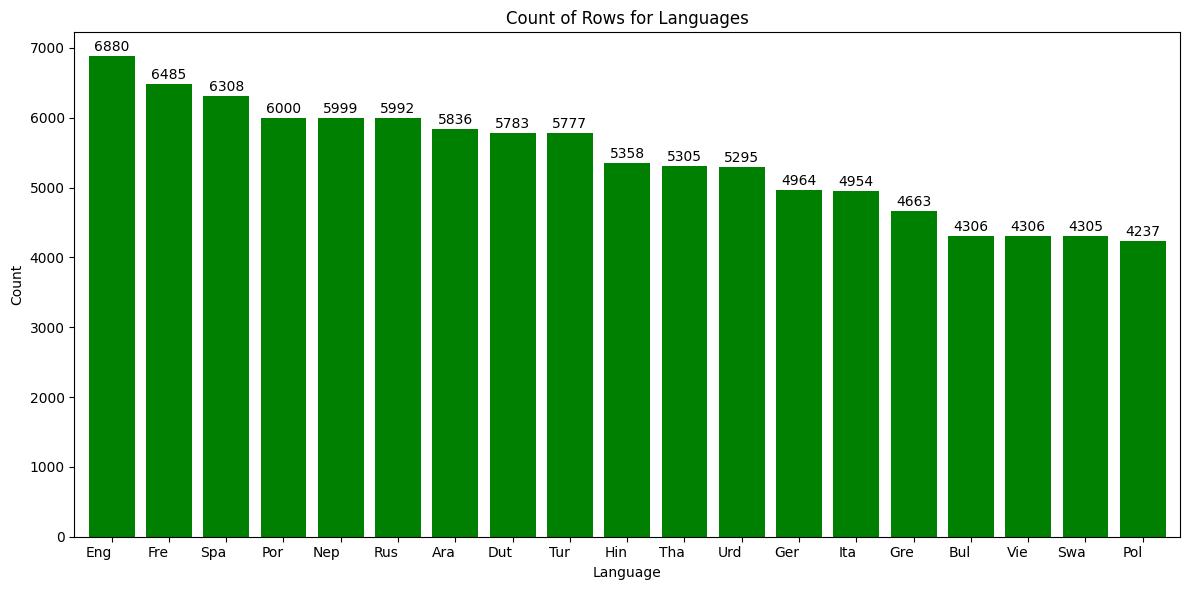

In [6]:
#3 plot a bar chart
import matplotlib.pyplot as plt
# Plot a bar chart with adjusted size
plt.figure(figsize=(12, 6))  # Adjust the size here (width, height)
bars = language_counts.plot(kind='bar', width=0.8, color="green")
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Count of Rows for Languages')

# Add counts on top of each bar vertically with adjusted font size
for i in range(len(language_counts)):
    plt.text(x=i, y=language_counts[i] + 30, s=language_counts[i], ha='center', va='bottom', rotation=0, fontsize=10)

# Adjust x-axis tick labels rotation for better readability
plt.xticks(rotation=0, ha='right')

plt.tight_layout()
plt.show()

## Data Cleaning Process

In [7]:
##Remove numerical characters and lower case the text column
import re
# Apply regex to remove punctuation and digits, and then convert to lowercase
##filtered_m_data['cleaned_text'] = filtered_m_data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['cleaned_text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x.lower())

df=df[["cleaned_text","language"]]


### Splitting the df into 3 seperate dfs based on alphabetical characters and non-alphabetic characters
# Define lists of English and non-English languages
english_languages = ['Eng', 'Fre', 'Spa', 'Por', 'Dut', 'Tur', 'Ger', 'Ita', 'Pol', 'Vie', 'Swa']

non_english_languages = ['Ara', 'Hin', 'Tha', 'Urd', 'Nep']

rus_bul= ["Rus", "Bul", "Gre"]


In [8]:
import pandas as pd
# Define lists of English and non-English languages
english_languages = ['Eng', 'Fre', 'Spa', 'Por', 'Dut', 'Tur', 'Ger', 'Ita', 'Pol', 'Vie', 'Swa']
non_english_languages = ['Ara', 'Hin', 'Tha', 'Urd', 'Nep']
rus_bul= ["Rus", "Bul", "Gre"]

# Filter the DataFrame based on language
english_df = df[df['language'].isin(english_languages)]
non_english_df = df[df['language'].isin(non_english_languages)]
rus_bul_df= df[df['language'].isin(rus_bul)]


In [ ]:
##

In [9]:
## cleaning english df removing special characters and removing single character words
english_df['cleaned_text'] = english_df['cleaned_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
english_df['cleaned_text'] = english_df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))
english_df.sample(5)

<ipython-input-9-1c9dbebf2860>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_df['cleaned_text'] = english_df['cleaned_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
<ipython-input-9-1c9dbebf2860>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_df['cleaned_text'] = english_df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))


,cleaned_text,language
53962,nowe world trade center ogłosiło najwyższy bud...,Pol
63743,temo che in questo caso siamo sfortunati,Ita
90016,st place in freedom of the press best local no...,Eng
99193,es una forma muy francesa de decir reunión cit...,Spa
9379,santorini và mykonos trong đặc biệt có một lượ...,Vie


In [10]:
## cleaning russian, bulgarian and greek languages using custom filter like removing typical english caracters and special characters. 
import re

# Define a function to remove English words
def remove_english(text):
    # Regular expression to match English words
    english_pattern = r'\b[a-zA-Z]+\b'

    # Replace English words with an empty string
    cleaned_text = re.sub(english_pattern, '', text)

    return cleaned_text

# Apply the function to the 'cleaned_text' column
rus_bul_df['cleaned_text'] = rus_bul_df['cleaned_text'].apply(remove_english)
rus_bul_df['cleaned_text'] = rus_bul_df['cleaned_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
rus_bul_df1=rus_bul_df
rus_bul_df1.sample(5)

<ipython-input-10-683b62f90a66>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rus_bul_df['cleaned_text'] = rus_bul_df['cleaned_text'].apply(remove_english)
<ipython-input-10-683b62f90a66>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rus_bul_df['cleaned_text'] = rus_bul_df['cleaned_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


,cleaned_text,language
35687,вторая мировая война была более разрушительной...,Rus
27323,δεν είχα ακούσει γι αυτό,Gre
56894,знаеш че ако не можеш да останеш ако нещо се...,Bul
39809,същото и ние,Bul
8313,няма експерт по света който би могъл без да ...,Bul


In [11]:
## cleaning non- english languages
import re

# Define a function to remove English, Russian, and Hebrew words
def remove_non_target_language(cleaned_text):
    # Regular expression to match English, Russian, and Hebrew words
    pattern = r'\b(?:[a-zA-Z]+|[а-яА-ЯёЁ]+|[א-ת]+)\b'
    # Regular expression to match specified symbols
    pattern_symbols = r'[्#$%^!*()_\-, ् ##–#]+'
    # Replace English, Russian, and Hebrew words wisome special chatracters th an empty string
    cleaned_text = re.sub(pattern, '', cleaned_text)

    return cleaned_text

# Apply the function to the 'cleaned_text' column
non_english_df['cleaned_text'] = non_english_df['cleaned_text'].apply(remove_non_target_language)
non_english_df1 = non_english_df
non_english_df1.sample(5)

<ipython-input-11-3f09715e71b9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_english_df['cleaned_text'] = non_english_df['cleaned_text'].apply(remove_non_target_language)


,cleaned_text,language
80705,नेपाल विद्युत प्राधिकरणले एक वर्षमा जति आम्दान...,Nep
60216,الادوات لا يجب ان تحمل المسؤولية . ' ' ' ' ' ' ',Ara
24105,हाँ तुम भी अलविदा अलविदा,Hin
81584,राजधानीको भृकुटीमण्डपमा बुधबारदेखि सवारी साधनक...,Nep
1985,تاكد من انهم لم يكن عليهم ان يفعلوا ذلك مرة اخ...,Ara


In [12]:
## finally concat all there dfs into a single df for train test split
df_finalx= pd.concat([english_df, non_english_df1, rus_bul_df1])
df_finalx

,cleaned_text,language
0,os chefes de defesa da estónia letónia lituâni...,Por
4,jak sobie życzysz widzisz jak hitler zabija żydów,Pol
6,zabuni ya ushindani pia imekuwa rahisi kwa sif...,Swa
7,devasa yüzyıl abbatiale saintpierreetsaintpaul...,Tur
9,duas raças diferentes de cães castanhos branco...,Por
...,...,...
100586,однажды мелли и терри снова пришли встретиться...,Rus
100587,о привет вы двое так скажите нам мэриан,Rus
100588,как теперь нарциссизм мэриан рассказал им обои...,Rus
100589,думаю она не хотела бы больше золотого хлеба а...,Rus


In [13]:
language_counts1 = df_finalx['language'].value_counts()

print(language_counts1)

language
Eng    6880
Fre    6485
Spa    6308
Por    6000
Nep    5999
Rus    5992
Ara    5836
Dut    5783
Tur    5777
Hin    5358
Tha    5305
Urd    5295
Ger    4964
Ita    4954
Gre    4663
Bul    4306
Vie    4306
Swa    4305
Pol    4237
Name: count, dtype: int64


#### Now the data is ready for train and test part, so we are count vectorizing the data to extract bag of words features

#### In this part we will be splitting the data into 70/10/20 for train, validationa and test. We will make sure that each language is divided into 70/10/20 split for the model to be more accurate and more better performance.

In [14]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import vstack  # Importing vstack function

# Assuming df_cleaned contains your DataFrame with "clean_text" and "language" columns

# Creating numpy arrays for the "clean_text" and "language" columns
x = np.array(df_finalx["cleaned_text"])
y = np.array(df_finalx["language"])

# Initialize a CountVectorizer to create bag of word features
cv = CountVectorizer()

# Transform the text data into a sparse matrix of token counts
X = cv.fit_transform(x)
from scipy.sparse import vstack

# Initialize empty sparse matrices for training, validation, and testing data
X_train = None
X_val = None
X_test = None
y_train = []
y_val = []
y_test = []

# Split the data for each language into training, validation, and testing sets
for lang in np.unique(y):
    # Get the indices corresponding to the current language
    indices = np.where(y == lang)[0]

    # Split the indices into training, validation, and testing sets with 70-10-20 split
    train_indices, temp_indices = train_test_split(indices, test_size=0.3, random_state=0)
    val_indices, test_indices = train_test_split(temp_indices, test_size=2/3, random_state=0)

    # Extract the corresponding sparse matrices for training, validation, and testing
    X_train_lang = X[train_indices]
    X_val_lang = X[val_indices]
    X_test_lang = X[test_indices]

    # Concatenate sparse matrices for each language
    if X_train is None:
        X_train = X_train_lang
        X_val = X_val_lang
        X_test = X_test_lang
    else:
        X_train = vstack((X_train, X_train_lang))
        X_val = vstack((X_val, X_val_lang))
        X_test = vstack((X_test, X_test_lang))

    # Extend the language labels
    y_train.extend(y[train_indices])
    y_val.extend(y[val_indices])
    y_test.extend(y[test_indices])

# Convert lists to numpy arrays for language labels
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Now X_train, X_val, and X_test contain the training, validation, and testing data with 70-10-20 split for each language


In [15]:
X_train.shape

(71919, 294070)

In [16]:
X_test.shape

(20563, 294070)

In [17]:
X_val.shape

(10271, 294070)

In [18]:
## apply count vectorizer fro bag of words model
from collections import Counter

# Count occurrences of each language in training data
train_language_counts = Counter(y_train)

# Count occurrences of each language in validation data
val_language_counts = Counter(y_val)

# Count occurrences of each language in testing data
test_language_counts = Counter(y_test)

print("Training Data Language Counts:")
for lang, count in train_language_counts.items():
    print(f"{lang}: {count}")

print("\nValidation Data Language Counts:")
for lang, count in val_language_counts.items():
    print(f"{lang}: {count}")

print("\nTesting Data Language Counts:")
for lang, count in test_language_counts.items():
    print(f"{lang}: {count}")


Training Data Language Counts:
Ara: 4085
Bul: 3014
Dut: 4048
Eng: 4816
Fre: 4539
Ger: 3474
Gre: 3264
Hin: 3750
Ita: 3467
Nep: 4199
Pol: 2965
Por: 4200
Rus: 4194
Spa: 4415
Swa: 3013
Tha: 3713
Tur: 4043
Urd: 3706
Vie: 3014

Validation Data Language Counts:
Ara: 583
Bul: 430
Dut: 578
Eng: 688
Fre: 648
Ger: 496
Gre: 466
Hin: 536
Ita: 495
Nep: 600
Pol: 424
Por: 600
Rus: 599
Spa: 631
Swa: 430
Tha: 530
Tur: 578
Urd: 529
Vie: 430

Testing Data Language Counts:
Ara: 1168
Bul: 862
Dut: 1157
Eng: 1376
Fre: 1298
Ger: 994
Gre: 933
Hin: 1072
Ita: 992
Nep: 1200
Pol: 848
Por: 1200
Rus: 1199
Spa: 1262
Swa: 862
Tha: 1062
Tur: 1156
Urd: 1060
Vie: 862


### MNB Model

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


# Define a grid of hyperparameters to search
param_grid = {'alpha': [0.01, 0.09, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0]}

# Initialize GridSearchCV with the MultinomialNB model, parameter grid, and 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=cv)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found during the grid search
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)


Best Alpha: 0.01


In [20]:
# Create a new MultinomialNB model with the best alpha value
best_model = MultinomialNB(alpha=best_alpha)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

In [21]:
# Evaluate the best model on the training set
y_pred_train = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

# Evaluate the best model on the validation set
y_pred_val = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", val_accuracy)

# Evaluate the best model on the testing set
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9965238671282971
Validation Accuracy: 0.9922110797390712
Testing Accuracy: 0.9911491513884161


In [22]:
from sklearn.metrics import classification_report

# Evaluate the best model on the testing set and generate classification report
y_pred_test = best_model.predict(X_test)
report = classification_report(y_test, y_pred_test)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

         Ara       1.00      1.00      1.00      1168
         Bul       0.99      1.00      0.99       862
         Dut       1.00      0.98      0.99      1157
         Eng       0.95      1.00      0.97      1376
         Fre       1.00      1.00      1.00      1298
         Ger       1.00      1.00      1.00       994
         Gre       1.00      1.00      1.00       933
         Hin       1.00      0.96      0.98      1072
         Ita       0.98      0.99      0.99       992
         Nep       0.98      1.00      0.99      1200
         Pol       0.96      0.98      0.97       848
         Por       0.99      0.98      0.99      1200
         Rus       1.00      0.99      1.00      1199
         Spa       1.00      0.99      1.00      1262
         Swa       1.00      0.98      0.99       862
         Tha       1.00      1.00      1.00      1062
         Tur       1.00      0.99      0.99      1156
    

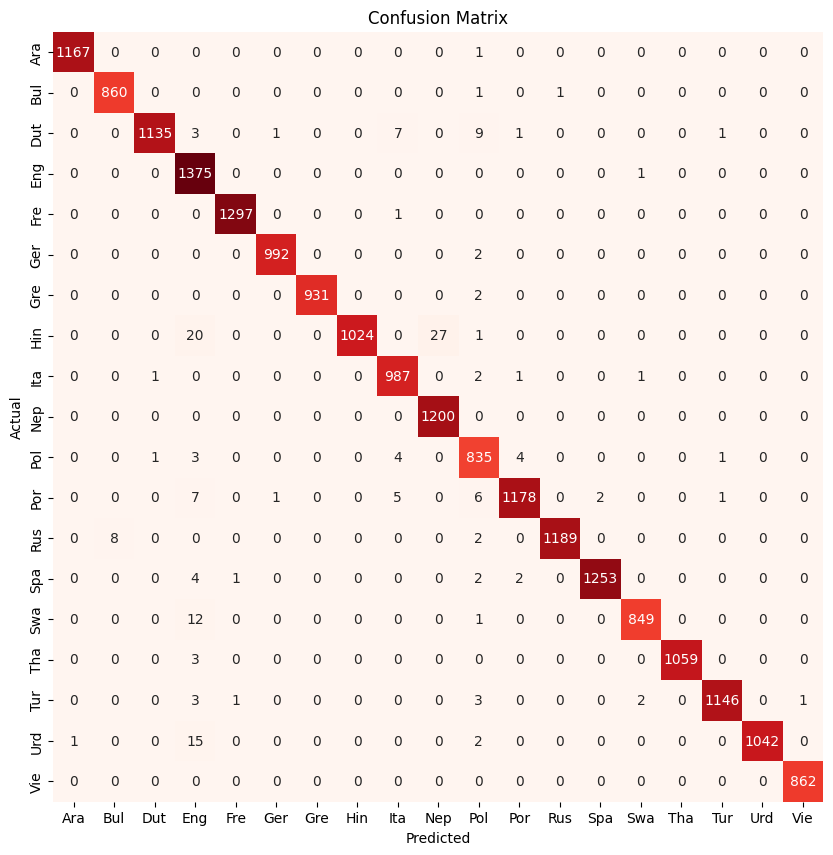

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix with values inside the boxes
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False, square=True,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [25]:
from sklearn.linear_model import LogisticRegression

### Logistic Regression

In [26]:
'''
from sklearn.linear_model import LogisticRegression

# Define a grid of hyperparameters to search
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['none', 'l2']}

# Initialize GridSearchCV with the LogisticRegression model, parameter grid, and 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=LogisticRegression(solver='liblinear', max_iter=5000), param_grid=param_grid, cv=cv)
# Perform grid search on the training data
grid_search.fit(X_val, y_val)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_
'''

"\nfrom sklearn.linear_model import LogisticRegression\n\n# Define a grid of hyperparameters to search\nparam_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['none', 'l2']}\n\n# Initialize GridSearchCV with the LogisticRegression model, parameter grid, and 5-fold cross-validation\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\ngrid_search = GridSearchCV(estimator=LogisticRegression(solver='liblinear', max_iter=5000), param_grid=param_grid, cv=cv)\n# Perform grid search on the training data\ngrid_search.fit(X_val, y_val)\n\n# Get the best hyperparameters found during the grid search\nbest_params = grid_search.best_params_\n"

In [27]:
# Create a new LogisticRegression model with the best parameters
best_model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000,C= 1, penalty= 'l2')

# Fit the best model on the training data
best_model1.fit(X_train, y_train)


LogisticRegression(C=1, max_iter=5000, multi_class='multinomial')

In [28]:
# Generate predictions for the testing set
y_pred_test1 = best_model1.predict(X_test)


In [29]:
# Evaluate the best model on the training set
train_accuracy1 = best_model1.score(X_train, y_train)
print("Training Accuracy:", train_accuracy1)

# Evaluate the best model on the validation set
val_accuracy1 = best_model1.score(X_val, y_val)
print("Validation Accuracy:", val_accuracy1)

# Evaluate the best model on the testing set
test_accuracy1 = best_model1.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy1)


Training Accuracy: 0.9976779432417024
Validation Accuracy: 0.9801382533346314
Testing Accuracy: 0.9786996060886057


In [30]:
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_test, y_pred_test1))


              precision    recall  f1-score   support

         Ara       1.00      0.98      0.99      1168
         Bul       0.98      0.97      0.97       862
         Dut       0.99      0.97      0.98      1157
         Eng       0.98      0.99      0.99      1376
         Fre       1.00      0.99      0.99      1298
         Ger       0.99      0.99      0.99       994
         Gre       1.00      0.97      0.99       933
         Hin       0.99      0.97      0.98      1072
         Ita       0.99      0.98      0.98       992
         Nep       1.00      0.99      1.00      1200
         Pol       0.75      0.99      0.85       848
         Por       0.97      0.98      0.97      1200
         Rus       0.98      0.98      0.98      1199
         Spa       1.00      0.98      0.99      1262
         Swa       0.99      0.96      0.97       862
         Tha       1.00      0.98      0.99      1062
         Tur       1.00      0.97      0.98      1156
         Urd       1.00    

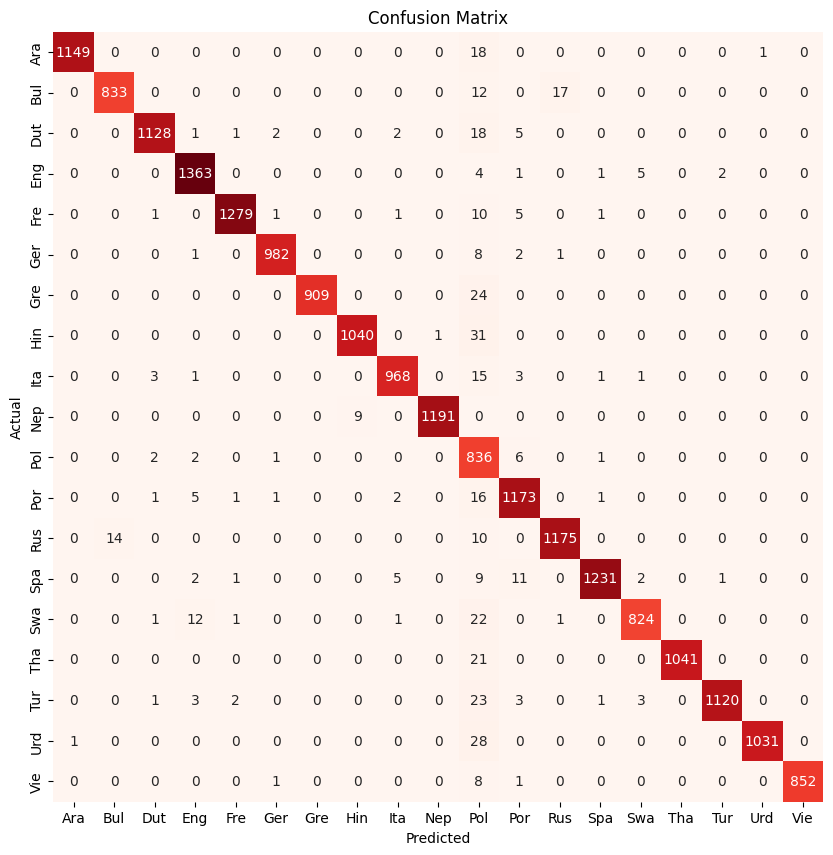

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test1)

# Plot confusion matrix with values inside the boxes
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False, square=True,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Support Vector Machine

In [33]:
'''
from sklearn.ensemble import RandomForestClassifier

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize GridSearchCV with the RandomForestClassifier model, parameter grid, and 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=cv)

# Perform grid search on the training data
grid_search.fit(X_val, y_val)

# Get the best hyperparameters found during the grid search
best_params_rf = grid_search.best_params_
'''

"\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Define a grid of hyperparameters to search\nparam_grid = {\n    'n_estimators': [50, 100, 150],  # Number of trees in the forest\n    'max_depth': [None, 10, 20],      # Maximum depth of the trees\n    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node\n    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node\n    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split\n}\n\n# Initialize GridSearchCV with the RandomForestClassifier model, parameter grid, and 5-fold cross-validation\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\ngrid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=cv)\n\n# Perform grid search on the training data\ngrid_search.fit(X_val, y_val)\n\n# Get the best hyperparameters found during the grid search\nbe

In [34]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Assuming X_train_text and X_test_text are your text data for training and testing
# Assuming y_train and y_test are your corresponding labels


# Create a LinearSVC model
model = LinearSVC(dual=False)
# Fit the model on the training data
model.fit(X_train, y_train)

# Predict labels for the test data
y_pred2 = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)


Accuracy: 0.9801585371784273


In [35]:
from sklearn.metrics import accuracy_score

# Predict labels for the training data
y_train_pred2 = model.predict(X_train)
# Calculate training accuracy
train_accuracy2 = accuracy_score(y_train, y_train_pred2)
print("Training Accuracy:", train_accuracy2)

# Predict labels for the validation data
y_val_pred2 = model.predict(X_val)
# Calculate validation accuracy
val_accuracy2 = accuracy_score(y_val, y_val_pred2)
print("Validation Accuracy:", val_accuracy2)

# Predict labels for the test data
y_test_pred2 = model.predict(X_test)
# Calculate test accuracy
test_accuracy2 = accuracy_score(y_test, y_test_pred2)
print("Test Accuracy:", test_accuracy2)


Training Accuracy: 0.9990823009218704
Validation Accuracy: 0.9822802064063869
Test Accuracy: 0.9801585371784273


In [36]:
# Generate the classification report
report2 = classification_report(y_test, y_test_pred2)

# Print the classification report
print("Classification Report for Random Forest Model:")
print(report2)

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

         Ara       1.00      0.98      0.99      1168
         Bul       0.98      0.97      0.98       862
         Dut       0.99      0.98      0.98      1157
         Eng       0.98      0.99      0.99      1376
         Fre       1.00      0.99      0.99      1298
         Ger       0.99      0.99      0.99       994
         Gre       1.00      0.98      0.99       933
         Hin       0.82      0.99      0.90      1072
         Ita       0.99      0.98      0.98       992
         Nep       1.00      0.99      0.99      1200
         Pol       0.98      0.96      0.97       848
         Por       0.98      0.98      0.98      1200
         Rus       0.98      0.97      0.98      1199
         Spa       0.99      0.98      0.99      1262
         Swa       0.98      0.97      0.98       862
         Tha       1.00      0.98      0.99      1062
         Tur       1.00      0.96 

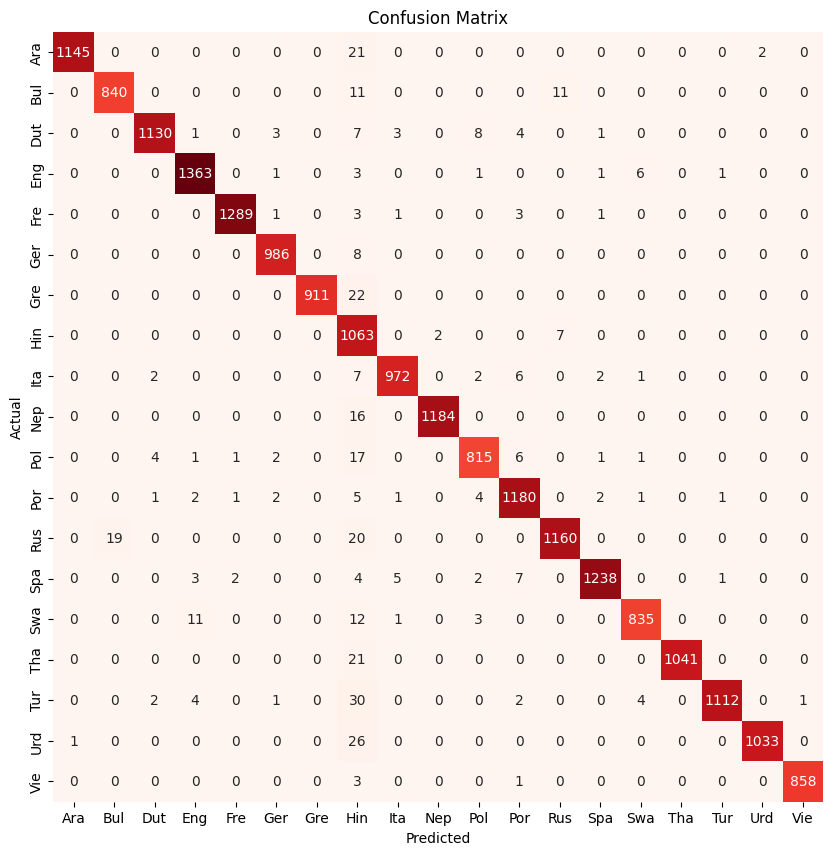

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred2)

# Plot confusion matrix with values inside the boxes
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False, square=True,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()